### Урок 2. Масштабирование признаков. Регуляризация. Стохастический градиентный спуск.

In [124]:
import numpy as np
import matplotlib.pyplot as plt

In [125]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 5, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450, 800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 1, 3, 3, 1, 2]])

In [126]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

In [127]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [128]:
def eval_model_reg2(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * W) 
#         if i % (iterations / 10) == 0:
#             print(i, W, err)
    return W

In [129]:
W = np.random.randn(X.shape[0])
W

array([-0.23415337, -0.23413696,  1.57921282,  0.76743473])

## Д/з

* Постройте график зависимости весов всех признаков от lambda в L2-регуляризации (на данных из урока). Сделайте вывод

In [130]:
W_lambda_e2 = eval_model_reg2(X_st, y, iterations=5000, alpha=1e-2, lambda_=1e2)
W_lambda_e1 = eval_model_reg2(X_st, y, iterations=5000, alpha=1e-2, lambda_=1e1)
W_lambda_1 = eval_model_reg2(X_st, y, iterations=5000, alpha=1e-2, lambda_=1)
W_lambda_1e_1 = eval_model_reg2(X_st, y, iterations=5000, alpha=1e-2, lambda_=1e-1)
W_lambda_1e_2 = eval_model_reg2(X_st, y, iterations=5000, alpha=1e-2, lambda_=1e-2)
W_lambda_1e_3 = eval_model_reg2(X_st, y, iterations=5000, alpha=1e-2, lambda_=1e-3)
W_lambda_1e_4 = eval_model_reg2(X_st, y, iterations=5000, alpha=1e-2, lambda_=1e-4)
W_lambda_1e_5 = eval_model_reg2(X_st, y, iterations=5000, alpha=1e-2, lambda_=1e-5)
print(W_lambda_e2)
print(W_lambda_e1)
print(W_lambda_1)
print(W_lambda_1e_1)
print(W_lambda_1e_2)
print(W_lambda_1e_3)
print(W_lambda_1e_4)
print(W_lambda_1e_5)

[1.10784314 0.20547419 0.19795963 0.20576233]
[9.41666667 1.44984507 1.33835494 1.42938586]
[37.66666667  4.01145689  2.67324854  3.68757438]
[53.80952381  5.73058911  0.98368306  5.51609942]
[56.21890547  6.23067581 -0.16462974  6.42092637]
[56.47176412  6.29561264 -0.33623812  6.55564816]
[56.49717514  6.30231751 -0.35424091  6.56978425]
[56.4997175   6.3029902  -0.35605002  6.57120483]


In [58]:
%matplotlib inline

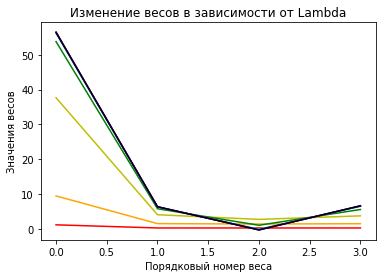

In [131]:
plt.title('Изменение весов в зависимости от Lambda')
plt.xlabel('Порядковый номер веса')
plt.ylabel('Значения весов')
plt.plot([0, 1, 2, 3], W_lambda_e2, color='r',  label = 'Lambda = e2')
plt.plot([0, 1, 2, 3], W_lambda_e1, color='orange',  label = 'Lambda = e1')
plt.plot([0, 1, 2, 3], W_lambda_1, color='y',  label = 'Lambda = 1')
plt.plot([0, 1, 2, 3], W_lambda_1e_1, color='g',  label = 'Lambda = 1e-1')
plt.plot([0, 1, 2, 3], W_lambda_1e_2, color='c',  label = 'Lambda = 1e-2')
plt.plot([0, 1, 2, 3], W_lambda_1e_3, color='b',  label = 'Lambda = 1e-3')
plt.plot([0, 1, 2, 3], W_lambda_1e_4, color='m',  label = 'Lambda = 1e-4')
plt.plot([0, 1, 2, 3], W_lambda_1e_5, color='k',  label = 'Lambda = 1e-5')

plt.show()

Вывод:
    Чем больше Lambda, тем меньше значения весов из-за стремления среднеквадратической ошибки к минимуму

* Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

Можно, но зачем? и на практике наверное не имеет смысла? Проверим.

In [132]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

Сначала стандартизируем, потом нормируем.

In [133]:
X_test1 = X.copy()
scaler_stand = StandardScaler()
scaler_norm = MinMaxScaler()
X_test2 = scaler_stand.fit_transform(X_test1)
X_test3 = scaler_norm.fit_transform(X_test2)
print(X_test3)
print(X_test3.min(), X_test3.max())

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 1.25000000e-03 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.33511348e-03 6.67779633e-03
  1.38026225e-03 0.00000000e+00 2.66844563e-03 4.50225113e-03
  0.00000000e+00 1.00100100e-03]
 [1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00 1.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.33511348e-03 0.00000000e+00
  6.90131125e-04 1.25000000e-03 1.33422282e-03 1.00050025e-03
  0.00000000e+00 1.00100100e-03]]
0.0 1.0


Данные отмасштабированы от 0 до 1 по последнему методу.
Теперь наоборот: нормируем, потом стандартизируем. 

In [134]:
X_test11 = X.copy()
scaler_stand = StandardScaler()
scaler_norm = MinMaxScaler()
X_test22 = scaler_norm.fit_transform(X_test1)
X_test33 = scaler_stand.fit_transform(X_test2)
print(X_test33)
print(X_test33.min(), X_test33.max())

[[-0.57735027 -0.57735027 -0.57940718 -0.58249071 -0.57894479 -0.57638682
  -0.58043426 -0.58158972 -0.57735027 -0.57889218]
 [-0.57735027 -0.57735027 -0.57632113 -0.5670349  -0.57575501 -0.57927597
  -0.57426353 -0.57117319 -0.57735027 -0.57657893]
 [ 1.73205081  1.73205081  1.73204943  1.73201633  1.73204971  1.7320496
   1.73204669  1.73203785  1.73205081  1.73205004]
 [-0.57735027 -0.57735027 -0.57632113 -0.58249071 -0.5773499  -0.57638682
  -0.5773489  -0.57927494 -0.57735027 -0.57657893]]
-0.582490711396413 1.7320508075688774


Данные отмасштабированы по последнему использованному методу стандартизации.

* Напишите функцию наподобие eval_model_reg2, но для применения L1-регуляризации.

In [141]:
def eval_model_reg1(X, y, iterations, alpha=1e-4, lambda_=1e-2):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        sum_w = 0 
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * np.sum(np.abs(W))) # 
#         if i % (iterations / 10) == 0:
#             print(i, W, err)
    return W

In [142]:
W_lambda1_1e_2 = eval_model_reg1(X_st, y, iterations=5000, alpha=1e-2)
W_lambda1_1e_2

array([56.15448985,  6.12005344, -0.41592844,  6.41158805])

In [143]:
W_lambda2_1e_2 = eval_model_reg2(X_st, y, iterations=5000, alpha=1e-2, lambda_=1e-2)
W_lambda2_1e_2

array([56.21890547,  6.23067581, -0.16462974,  6.42092637])